<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-Задание" data-toc-modified-id="Домашнее-Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашнее Задание</a></span></li></ul></div>

# Домашнее Задание 
+ Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф".
+ Cохранить результаты в pandas dataframe.

Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных. -- Проверить индекс, чтобы он соответствовал порядку строк. -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки (например, заменить медианой, 0, -99999, удалить наблюдения с пропусками)

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

 Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -- Рассчитать объемы вводимого жилья по регионам и по годам. -- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах. -- Визуализировать разброс, связь и распределение этих показателей по регионам. -- Сделать выводы по каждому из расчетов и графиков

In [13]:
import requests,math
from tqdm.auto import tqdm


In [15]:
offset_ = 1 # размер шага
limit_ = 1000 # количество объектов в выдаче
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'

In [16]:
res = requests.get(url)
objects_data = res.json()
#количество объектов всего
objects_data['data']['total']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [6]:
# Запускаем цикл для сбора всех идентификаторов объектов со всех страниц
all_object_ids= []
while True:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    objects_data = res.json() 
    all_object_ids.extend(objects_data.get('data').get('list'))
    offset_=offset_+limit_
    if len(objects_data.get('data').get('list'))<100:
        all_object_ids.extend(objects_data.get('data').get('list'))
        break
    

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
len(all_object_ids)

11709

In [126]:
# Создаем таблицу DataFrame из всех полученных данных

In [9]:
import pandas as pd

In [10]:
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.json_normalize(all_object_ids)

In [12]:
df.head(10)

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,37165,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,37201,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,39024,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,37219,13391,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,6541,10891,35,"г Вологда, ул Медуницинская, д. 11",17,17,225,2023-12-31,12847.23,1,...,Акционерное общество,АО,7368.0,3525000888,"Жилой комплекс ""Рафинад""",NaN,NaN,NaN,NaN,NaN
5,136720,56006,54,"город Новосибирск, район Советский",4,4,24,2024-12-31,1003.20,0,...,Общество с ограниченной ответственностью,ООО,6230.0,5408001391,NaN,NaN,NaN,NaN,NaN,NaN
6,115751,30292,16,"г Казань, район Приволжский р-н, ул Карбышева",26,26,384,2024-03-31,30373.74,0,...,Общество с ограниченной ответственностью,ООО,7451.0,1655297266,NaN,NaN,NaN,NaN,NaN,NaN
7,36235,18708,50,"г Лыткарино, мкр 6-й, корпус 4",17,17,272,2023-12-31,12057.80,1,...,Общество с ограниченной ответственностью,ООО,9119.0,7722264703,"Жилой комплекс ""Новое Лыткарино""",ЖК Новое Лыткарино,NaN,NaN,NaN,NaN
8,26010,18709,50,"г Лыткарино, мкр 6-й, корпус 3",18,18,272,2023-12-31,12093.84,1,...,Общество с ограниченной ответственностью,ООО,9119.0,7722264703,"Жилой комплекс ""Новое Лыткарино""",ЖК Новое Лыткарино,NaN,NaN,NaN,NaN
9,42916,27803,54,п Ложок,3,3,12,2024-03-31,889.20,0,...,Непубличное акционерное общество,АО,6767.0,5408252116,"Коттеджный поселок ""Горки Академпарка""",Коттеджный поселок Горки Академпарка,NaN,NaN,NaN,NaN


In [13]:
df.shape

(11709, 39)

In [14]:
# Сохраняем в csv файл
df.to_csv('object.csv', index=False)
# Сохраняем в эксель-файл
df.to_excel('object.xlsx', index=False)
# Сохраняем в файл в формате pickle
df.to_pickle('object.pkl')

In [15]:
#названия всех колонок:
df.columns

Index(['hobjId', 'objId', 'rpdRegionCd', 'objAddr', 'objFloorMin',
       'objFloorMax', 'objElemLivingCnt', 'objReady100PercDt',
       'objSquareLiving', 'objCompensFundFlg', 'objProblemFlg', 'latitude',
       'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
       'residentialBuildings', 'rpdNum', 'pdId', 'buildType', 'objStatus',
       'hobjRenderPhotoUrl', 'objPriceAVG', 'objPublDt', 'developer.devId',
       'developer.shortName', 'developer.fullName', 'developer.groupName',
       'developer.orgForm.id', 'developer.orgForm.fullForm',
       'developer.orgForm.shortForm', 'developer.companyGroup',
       'developer.devInn', 'objCommercNm', 'complexShortName',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object')

In [16]:
#удаляем ненужные столбцы

del df['hobjId']
del df['objFloorMin']
del df['objCompensFundFlg']
del df['objProblemFlg']
del df['latitude']
del df['longitude']
del df['problemFlag']
del df['siteStatus']
del df['objGuarantyEscrowFlg']
del df['residentialBuildings']
del df['rpdNum']
del df['pdId']
del df['buildType']
del df['objStatus']
del df['hobjRenderPhotoUrl']
del df['objPublDt']
del df['developer.devId']
del df['developer.fullName']
del df['developer.groupName']
del df['developer.orgForm.id']
del df['developer.orgForm.fullForm']
del df['developer.orgForm.shortForm']
del df['developer.companyGroup']
del df['objCommercNm']
del df['complexShortName']
del df['developer.bankruptStage.bankruptStageCd']
del df['developer.bankruptStage.bankruptLawUrl']
del df['developer.orgBankruptMsgDttm']

In [17]:
#переименуем нужные столбцы:

df=df.rename(columns={'objId': 'ID_object', 
             'rpdRegionCd':'region', 
             'objAddr':'address_object', 
             'objFloorMax':'floors',
             'objElemLivingCnt':'number_apartments', 
             'objReady100PercDt':'commisioning_date', 
             'objSquareLiving':'living_space',  
             'objPriceAVG':'price', 
             'developer.bankruptStage.bankruptStageDesc':'bankrupt',       
             'developer.shortName':'developer',
             'developer.devInn':'INN'	})


In [18]:
#Удаляем пустые регионы
df.drop(df.loc[df['region'] == 49].index, inplace=True)
df.drop(df.loc[df['region'] == 79].index, inplace=True)
df.drop(df.loc[df['region'] == 83].index, inplace=True)
df.drop(df.loc[df['region'] == 87].index, inplace=True)

In [19]:
'''у нас несколько дублирующих застройщиков СЗ САМОЛЕТ-...,СЗ ПИК-...,
ФСК-... Переименуем и объединим их всех в "САМОЛЕТ","ПИК","ФСК" :'''
    
def zastroishik(peremennaya):
    if 'САМОЛЕТ' in peremennaya:
        return 'САМОЛЕТ'
    elif 'ПИК' in peremennaya:
        return 'ПИК'
    elif 'ФСК' in peremennaya:
        return 'ФСК'
    elif 'ЛСР' in peremennaya:
        return 'ЛСР'
    else:
        return peremennaya
    
#и присвоим новому столбцу developer1:
df['developer1']=df.developer.apply(zastroishik)

In [148]:
#группируем по региону и сортируем по возрастанию по средней стоимости квартиры за 1 м2:

mean_price=df.groupby('region',as_index=False)\
             .aggregate({'price':'mean'})\
             .sort_values('price')\
             .rename(columns={'price':'mean_price'})

#и видим, что самые дорогие квартиры: в Москве и Питере:

mean_price = mean_price.reset_index()
del mean_price['index']
mean_price

,region,mean_price
0,20,37381.500000
1,6,39976.000000
2,7,45203.491803
3,8,56147.285714
4,5,56562.166667
...,...,...
77,65,155523.868421
78,23,162334.729345
79,41,169584.000000
80,78,198385.221945


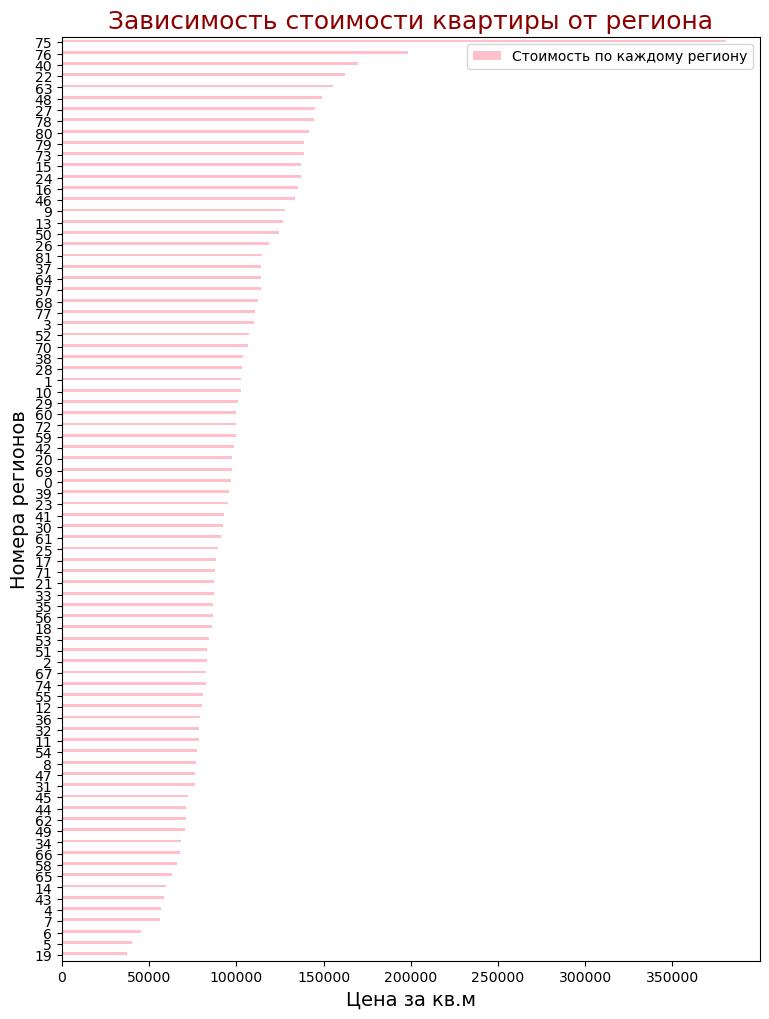

In [23]:
#Визуализация того, что в Москве самые дорогие квартиры
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
mean_price.plot(kind='barh',color='pink')
plt.title('Зависимость стоимости квартиры от региона',color='DarkRed',fontsize=18)
plt.xlabel('Цена за кв.м',fontsize=14)
plt.ylabel('Номера регионов',fontsize=14)
plt.legend(labels=['Стоимость по каждому региону'])
plt.show()

In [147]:
#группируем по каждому застройщику и сортируем по суммарной жилой площади, количеству домов и квартир:

developer_=df.query('living_space>0')\
             .groupby('developer1',as_index=False)\
             .aggregate({'living_space':'sum','number_apartments':'sum','ID_object':'count'})\
             .sort_values('living_space',ascending=[False])\
             .rename(columns={'developer1':'developer'})\
             .rename(columns={'ID_object':'number_of_houses'})


#добавим столбец с долей застройщика на рынке по площади строительства:
developer_['dolya'] = developer_.living_space*100/developer_.living_space.sum()


developer_ = developer_.reset_index()
del developer_['index']
developer_
#видим, что лидеры среди застройщиков: Самолёт, ПИК, ЛСР, ФСК, А101:

,developer,living_space,number_apartments,number_of_houses,dolya
0,САМОЛЕТ,2362805.22,56026,104,2.187116
1,ЛСР,2265212.04,60596,112,2.096780
2,СЗ А101,1174215.70,24700,30,1.086906
3,СЗ ПАРК ПОБЕДЫ-2,833216.30,20235,36,0.771262
4,ПИК,595337.19,13847,54,0.551070
...,...,...,...,...,...
3551,ПЕРОВОСТРОЙ,312.00,8,2,0.000289
3552,ДОМ-ИНВЕСТ,310.40,8,2,0.000287
3553,ТЕМП,305.60,8,1,0.000283
3554,ЭТПК СРЕДНЯЯ ВОЛГА,267.20,8,1,0.000247


In [149]:
#Выберем ТОП-10 застройщиков:
top_developer=developer_.head(10)
top_developer

,developer,living_space,number_apartments,number_of_houses,dolya
0,САМОЛЕТ,2362805.22,56026,104,2.187116
1,ЛСР,2265212.04,60596,112,2.096780
2,СЗ А101,1174215.70,24700,30,1.086906
3,СЗ ПАРК ПОБЕДЫ-2,833216.30,20235,36,0.771262
4,ПИК,595337.19,13847,54,0.551070
5,БРУСНИКА,548650.81,8842,34,0.507855
6,СЗ-1 ЮСИ-ДОН,521197.37,9944,36,0.482443
7,СЗ ЮГСТРОЙИМПЕРИАЛ,498056.70,10633,25,0.461023
8,СЗ ДОГМА-ВОСТОК,367136.70,7182,41,0.339838
9,СЗ ПРИГОРОД ЛЕСНОЕ,361242.64,8605,18,0.334382


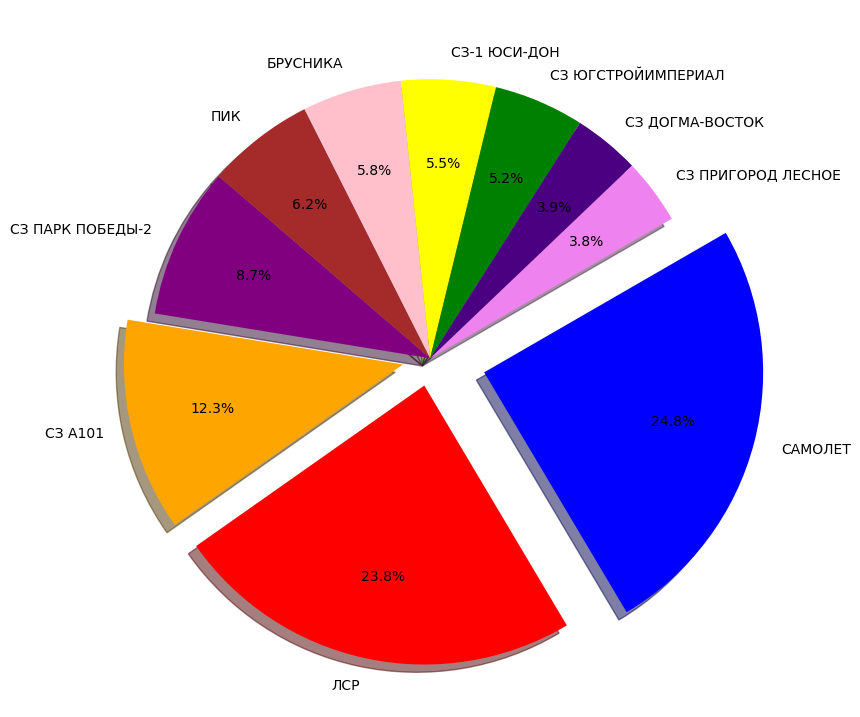

In [33]:
#визуализируем суммарную жилую площадь наиболее крупных застройщиков c помощью круговой диаграммы:

v = top_developer.living_space
labels = top_developer.developer
colors = ["blue", "red", "orange", "purple", "brown","pink","yellow","green","indigo","violet"]
explode = [0.2, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0]
# wedge_properties = {"edgecolor":"k",'linewidth': 1}
plt.pie(v, labels=labels, explode=explode, colors=colors, startangle=30,
           counterclock=False, shadow=True,autopct="%1.1f%%", pctdistance=0.7)
plt.show()


In [114]:
df.head()

,ID_object,region,address_object,floors,number_apartments,commisioning_date,living_space,price,developer,INN,bankrupt,developer1
0,13398,72,"г Тюмень, ул Профсоюзная, д. 56",10,43,2024-12-31,4812.98,47886.0,2МЕН ГРУПП,7701651356,NaN,2МЕН ГРУПП
1,13397,72,"г Тюмень, ул Профсоюзная, д. 56",12,65,2024-12-31,6251.10,47163.0,2МЕН ГРУПП,7701651356,NaN,2МЕН ГРУПП
2,13383,72,"г Тюмень, ул Профсоюзная, д. 56",20,68,2023-12-31,6423.85,67159.0,2МЕН ГРУПП,7701651356,NaN,2МЕН ГРУПП
3,13391,72,"г Тюмень, ул Профсоюзная, д. 56",12,44,2023-12-31,4343.90,62638.0,2МЕН ГРУПП,7701651356,NaN,2МЕН ГРУПП
4,10891,35,"г Вологда, ул Медуницинская, д. 11",17,225,2023-12-31,12847.23,47684.0,ААК ВОЛОГДААГРОСТРОЙ,3525000888,NaN,ААК ВОЛОГДААГРОСТРОЙ


In [ ]:
#сгруппирруем по дате сдачи домов:


In [139]:
sdacha=df.groupby('commisioning_date',as_index=False)\
             .aggregate({'ID_object':'count'})\
             .sort_values('commisioning_date')


In [140]:
'''посмотрим, в какие года будет больше всего сдачи строящегося жилья, для этого создадим новый столбец
и оставим в нем вместо полной даты только значение года сдачи'''

sdacha['year']=sdacha.commisioning_date.apply(lambda x:x[:4])
sdacha_year=sdacha


'посмотрим, в какие года будет больше всего сдачи строящегося жилья, для этого создадим новый столбец\nи оставим в нем вместо полной даты только значение года сдачи'

In [141]:
#теперь сгруппируем кол-во сдающихся объектов только по году сдачи:
sdacha_year=sdacha_year.groupby('year',as_index=False)\
             .aggregate({'ID_object':'sum'})\
             .sort_values('year')\
             .rename(columns={'ID_object':'counts'})
sdacha_year

,year,counts
0,2018,1
1,2019,2
2,2020,7
3,2021,3
4,2022,4
5,2023,1152
6,2024,4532
7,2025,3721
8,2026,1525
9,2027,468


In [142]:
sd=sdacha_year.query('counts>5')

Text(0.5, 1.0, 'Сколько домов в каком году сдастся')

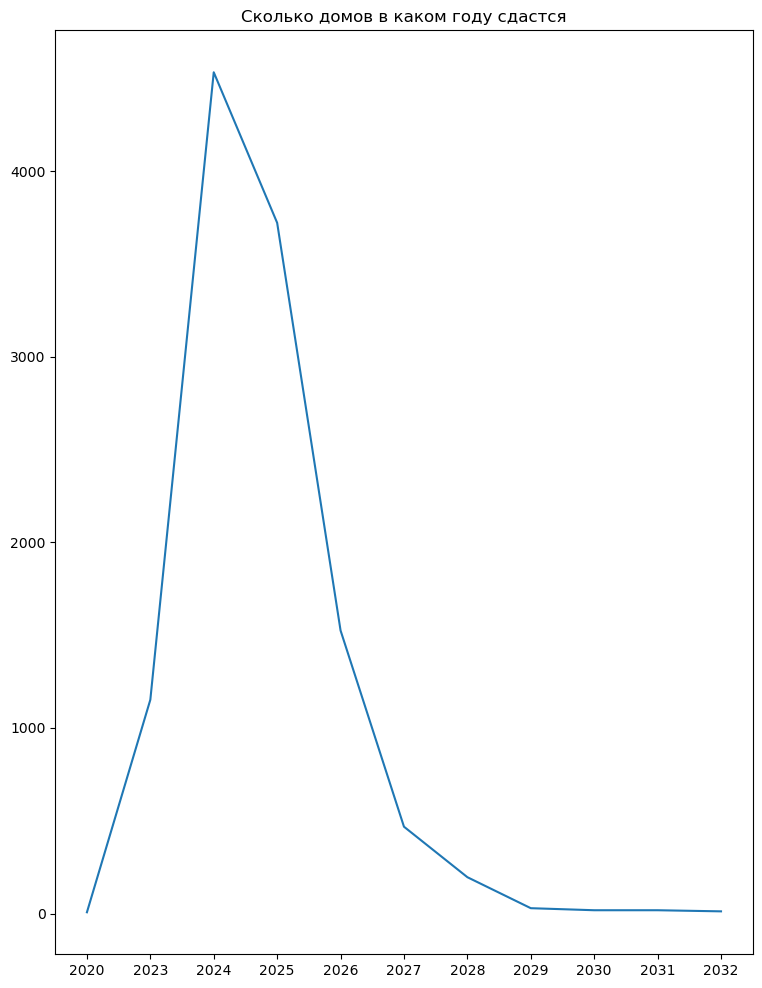

In [143]:
plt.plot(sd.year,sd.counts)
plt.title('Сколько домов в каком году сдастся')
plt.show()